<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/week-Apr.-17/DataDazzlers_MidCourseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we will use the New York City Airbnb Open Data:

https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv

We'll be working with the 'price' variable, and we'll transform it to a classification task.

In [98]:
#Dataframe and numerical library
import pandas as pd 
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from matplotlib import rcParams

#Machine Learming Model
#Metrics
from sklearn.metrics import mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#Linear Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

#Ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Others
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

#Hyper parameter
from sklearn import neighbors, datasets, model_selection

# Tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K






In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv")
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5004,3600961,Charming 1 Bed in Trendy Location!,18142696,Morgan,Manhattan,East Village,40.72974,-73.98372,Entire home/apt,160,2,5,2015-08-20,0.08,1,0
7266,5334478,One Bedroom Apartment in Chelsea,5074654,Seth,Manhattan,Chelsea,40.74326,-74.00004,Entire home/apt,199,2,98,2019-06-26,1.88,2,33
29517,22656623,Cozy 1 Bedroom in South Williamsburg,4993038,Tiffany,Brooklyn,Williamsburg,40.71082,-73.96128,Entire home/apt,300,1,1,2018-01-20,0.06,1,0
32036,25014162,Bright and spacious private bed-and bathroom!,18718315,Gigi,Brooklyn,Bedford-Stuyvesant,40.69197,-73.92795,Private room,75,4,25,2019-06-29,2.26,1,249
21870,17573354,"Luxury 1BR Apt w/ Rooftop, Gym and Skyline View",24580054,Michael,Brooklyn,Greenpoint,40.73204,-73.95874,Entire home/apt,250,2,0,NaN,NaN,1,0


In [ ]:
len(df)


48895

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [ ]:
# Selecting Required Features
df=df[['neighbourhood_group','room_type','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [ ]:
#Let's create a variable above_average which is 1 if the price is above (or equal to) 152.
# Create a new column 'above_average'
df['above_average'] = (df['price'] >= 152).astype(int)

<ipython-input-11-50303deeda24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_average'] = (df['price'] >= 152).astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
# Fill in the missing values with 0.
df.fillna(0, inplace=True)

<ipython-input-13-feaef9df9824>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
# calculate the mode for the 'neighbourhood_group' column
df['neighbourhood_group'].mode()[0]

'manhattan'

# Question 1

Question 1: What is the most frequent observation (mode) for the column 'neighbourhood_group'?

Answer: **Manhattan**

In [ ]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
above_average                     0
dtype: int64

In [ ]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split. Seed set to 42
x_train, x_test = train_test_split(df, test_size=0.2, random_state=41)

len(x_train), len(x_test)
# Replace nulls with 0's - these are pandas dataframes
x_train = x_train.fillna(0)

x_test = x_test.fillna(0)
len(x_train),len(x_test)

(39116, 9779)

In [ ]:
# X = input, Y = output
# Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (x_train.above_average).values
y_test = (x_test.above_average).values

#Make sure the target value is not in your dataframe
del x_train['above_average']
del x_test['above_average']

#Make sure the price value is not in your dataframe as it impact target value
del x_train['price']
del x_test['price']

In [ ]:
len(y_train),len(y_test)

(39116, 9779)

In [ ]:
x_train.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 41158 to 34752
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39116 non-null  object 
 1   room_type                       39116 non-null  object 
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   minimum_nights                  39116 non-null  int64  
 5   number_of_reviews               39116 non-null  int64  
 6   reviews_per_month               39116 non-null  float64
 7   calculated_host_listings_count  39116 non-null  int64  
 8   availability_365                39116 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.0+ MB


In [ ]:
# numerical features of your train dataset.
x_train_num = x_train[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [ ]:
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 41158 to 34752
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        39116 non-null  float64
 1   longitude                       39116 non-null  float64
 2   minimum_nights                  39116 non-null  int64  
 3   number_of_reviews               39116 non-null  int64  
 4   reviews_per_month               39116 non-null  float64
 5   calculated_host_listings_count  39116 non-null  int64  
 6   availability_365                39116 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 MB


<ipython-input-24-25ffa262e8c9>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_corr = x_train.corr(method="spearman") # pearson assumes a linear relationship... spearman does not


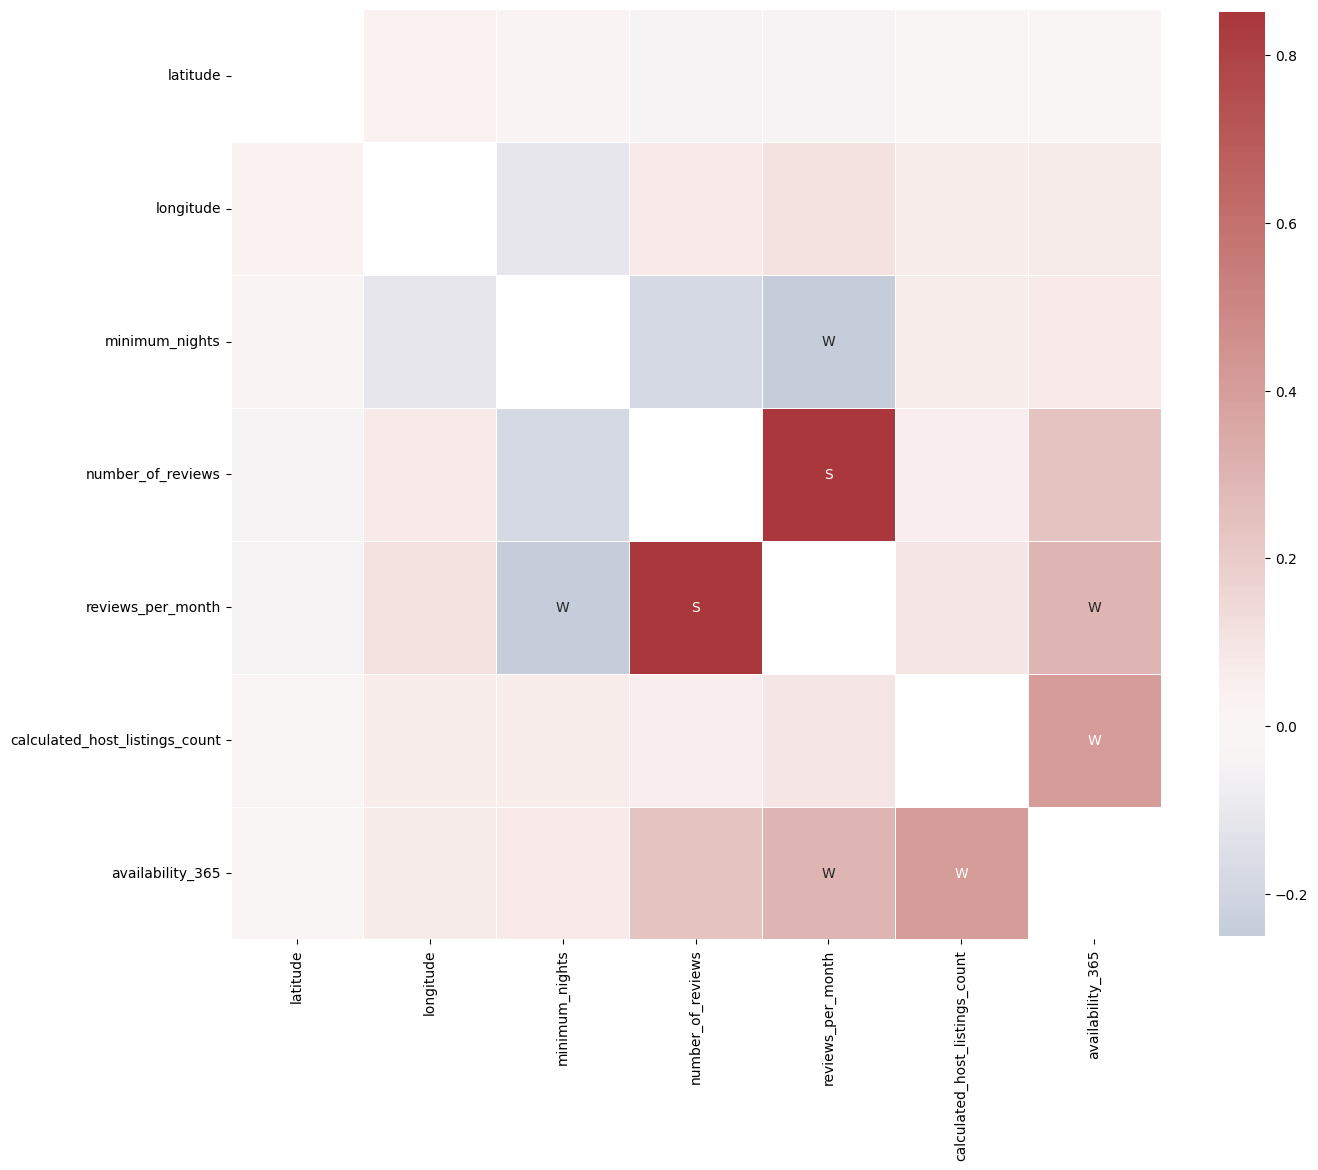

In [ ]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity
# Create the correlation matrix for the numerical features of your train dataset.

# Computes feature correlation
x_corr = x_train.corr(method="spearman") # pearson assumes a linear relationship... spearman does not

# Create labels for the correlation matrix
labels = np.where(np.abs(x_corr)>0.75, "S",
                  np.where(np.abs(x_corr)>0.5, "M",
                           np.where(np.abs(x_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(x_corr, mask=np.eye(len(x_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [ ]:
x_corr

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.034311,0.020668,-0.044097,-0.043096,0.000592,-0.005900
longitude,0.034311,1.000000,-0.115907,0.080479,0.109820,0.065841,0.069835
minimum_nights,0.020668,-0.115907,1.000000,-0.178377,-0.250848,0.062987,0.075373
number_of_reviews,-0.044097,0.080479,-0.178377,1.000000,0.850998,0.055085,0.237626
reviews_per_month,-0.043096,0.109820,-0.250848,0.850998,1.000000,0.094201,0.297894
calculated_host_listings_count,0.000592,0.065841,0.062987,0.055085,0.094201,1.000000,0.406144
availability_365,-0.005900,0.069835,0.075373,0.237626,0.297894,0.406144,1.000000


In [ ]:
# Find the highest correlation values between features
highest_corr = x_corr.unstack().sort_values(ascending=False).drop_duplicates()
highest_corr[1:3]

number_of_reviews  reviews_per_month                 0.850998
availability_365   calculated_host_listings_count    0.406144
dtype: float64

# Question 2

What are the two features that have the biggest correlation in this dataset?

number_of_reviews  reviews_per_month                 **0.850998**

availability_365   calculated_host_listings_count    **0.406144**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,brooklyn,private_room,40.64749,-73.97237,149,1,9,0.21,6,365,0
1,manhattan,entire_home/apt,40.75362,-73.98377,225,1,45,0.38,2,355,1
2,manhattan,private_room,40.80902,-73.94190,150,3,0,0.00,1,365,0
3,brooklyn,entire_home/apt,40.68514,-73.95976,89,1,270,4.64,1,194,0
4,manhattan,entire_home/apt,40.79851,-73.94399,80,10,9,0.10,1,0,0


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 41158 to 34752
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39116 non-null  object 
 1   room_type                       39116 non-null  object 
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   minimum_nights                  39116 non-null  int64  
 5   number_of_reviews               39116 non-null  int64  
 6   reviews_per_month               39116 non-null  float64
 7   calculated_host_listings_count  39116 non-null  int64  
 8   availability_365                39116 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.0+ MB


In [ ]:
# Calculate the mutual information score for the 'neighbourhood_group' feature
mi_neighbourhood = mutual_info_score(x_train['neighbourhood_group'], y_train)

# Calculate the mutual information score for the 'room_type' feature
mi_room_type = mutual_info_score(x_train['room_type'], y_train)

# Print the results rounded to 2 decimal digits
print(f"Mutual information score for 'neighbourhood_group': {round(mi_neighbourhood, 2)}")
print(f"Mutual information score for 'room_type': {round(mi_room_type, 2)}")

Mutual information score for 'neighbourhood_group': 0.05
Mutual information score for 'room_type': 0.14


# Question 3

Which of these two variables has a bigger score?

Mutual information score for 'room_type': 0.14


In [ ]:
#Remember that we have two categorical variables in the data. Include them using one-hot encoding.
# Define the columns to be one-hot encoded
categorical_features = ["neighbourhood_group", "room_type"]

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), x_train.select_dtypes(include=["int", "float"]).columns),
        ("cat", OneHotEncoder(), categorical_features)
    ])

# Fit and transform the training set
x_train_preprocessed = preprocessor.fit_transform(x_train)

# Transform the testing set
x_test_preprocessed = preprocessor.transform(x_test)

In [ ]:
# Define the logistic regression model
#To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [ ]:
# Fit the pipeline on the training dataset
model.fit(x_train_preprocessed, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Calculate the accuracy on the validation dataset
y_pred = model.predict(x_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.8023315267409755

In [ ]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[5921  883]
 [1050 1925]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6804
           1       0.69      0.65      0.67      2975

    accuracy                           0.80      9779
   macro avg       0.77      0.76      0.76      9779
weighted avg       0.80      0.80      0.80      9779



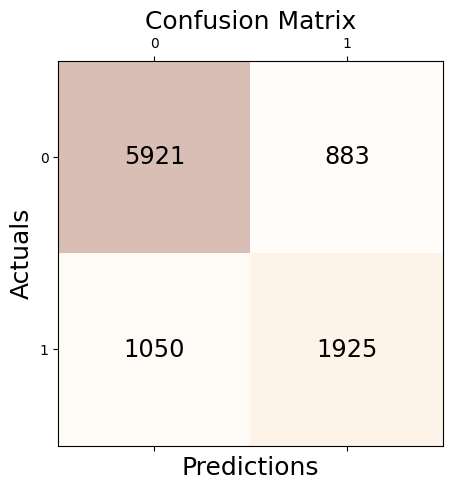

In [ ]:
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = model.predict(x_test_preprocessed)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Print the accuracy rounded to 2 decimal digits
print(f"Validation accuracy: {round(accuracy, 2)}")

Validation accuracy: 0.8


In [ ]:
original_accuracy = accuracy
original_accuracy


0.8023315267409755

# Question 4

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Validation accuracy: 0.80

In [ ]:
# Loop over each feature and train a model without it
# Iterate over each feature
# Initialize an empty list to store the feature importances
feature_importances = []
feature_accuracy = []

for i in range(x_train.shape[1]):
    # Remove the current feature from the training and testing sets
    x_train_without_feature = np.delete(x_train_preprocessed, i, axis=1)
    x_test_without_feature = np.delete(x_test_preprocessed, i, axis=1)

    # Train a logistic regression model on the updated training set
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

   # Fit the pipeline on the training dataset
    model.fit(x_train_without_feature, y_train)

    # Evaluate the model's performance on the updated testing set
    y_pred = model.predict(x_test_without_feature)
    accuracy = accuracy_score(y_test, y_pred)

     # Calculate the difference between the original accuracy and the accuracy without the i-th feature
    difference = original_accuracy - accuracy

    # Record the model's performance metric for the current feature
    feature_importances.append(difference)
    feature_accuracy.append(accuracy)

# Print the feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i} ({x_train.columns[i]}) : accuracy = {feature_accuracy[i]} , importance = {importance} ")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature 0 (neighbourhood_group) : accuracy = 0.8008998875140607 , importance = 0.0014316392269148048 
Feature 1 (room_type) : accuracy = 0.7897535535330811 , importance = 0.012577973207894444 
Feature 2 (latitude) : accuracy = 0.8018202270170774 , importance = 0.0005112997238980732 
Feature 3 (longitude) : accuracy = 0.8019224869618571 , importance = 0.00040903977911843636 
Feature 4 (minimum_nights) : accuracy = 0.8020247469066367 , importance = 0.0003067798343387995 
Feature 5 (number_of_reviews) : accuracy = 0.8015134471827385 , importance = 0.0008180795582369838 
Feature 6 (reviews_per_month) : accuracy = 0.7848450761836588 , importance = 0.01748645055731668 
Feature 7 (calculated_host_listings_count) : accuracy = 0.8023315267409755 , importance = 0.0 
Feature 8 (availability_365) : accuracy = 0.8023315267409755 , importance = 0.0 


# Question 5

Which of the following feature has the smallest difference?

neighbourhood_group - **0.0014316392269148048**

room_type - **0.012577973207894444**

number_of_reviews - **0.0008180795582369838**

reviews_per_month - **0.01748645055731668**


**number_of_reviews has the smallest difference in the overall accuracy from the above list**



In [ ]:
# Define a list of classifiers to test
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]


In [ ]:
from sklearn.metrics import roc_curve, auc
top_models = {}

# Iterate over the classifiers and fit them to the training data
for classifier in classifiers:
    classifier.fit(x_train_preprocessed, y_train)
    
    # Predict the probabilities for the test data
    y_prob = classifier.predict_proba(x_test_preprocessed)[:, 1]
    
    # Calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Print the ROC AUC score for the classifier
    print(f"{type(classifier).__name__} ROC AUC score: {roc_auc}")

    #save the model to a Map
    top_models[type(classifier).__name__] = roc_auc

    # Assuming y_test and y_prob are your test set labels and predicted probabilities, respectively
    # fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    # roc_auc = auc(fpr, tpr)

    # # Plot the ROC curve
    # plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver Operating Characteristic')
    # plt.legend(loc="lower right")
    # plt.show()

LogisticRegression ROC AUC score: 0.86566680993385
DecisionTreeClassifier ROC AUC score: 0.7351610273739124
RandomForestClassifier ROC AUC score: 0.895111896610496
GradientBoostingClassifier ROC AUC score: 0.8954733745349992


In [ ]:
top_models

{'LogisticRegression': 0.86566680993385,
 'DecisionTreeClassifier': 0.7351610273739124,
 'RandomForestClassifier': 0.895111896610496,
 'GradientBoostingClassifier': 0.8954733745349992}

In [ ]:
top_models_sorted = dict(sorted(top_models.items(), key=lambda x: x[1], reverse=True))
top_models_sorted

{'GradientBoostingClassifier': 0.8954733745349992,
 'RandomForestClassifier': 0.895111896610496,
 'LogisticRegression': 0.86566680993385,
 'DecisionTreeClassifier': 0.7351610273739124}

# Question 6

For this question, use the Classification template and identify the top 3 models based on ROC_AUC score.

RandomForestClassifier ROC AUC score: 0.8969076519496687

GradientBoostingClassifier ROC AUC score: 0.8954949634174658

LogisticRegression ROC AUC score: 0.86566680993385

In [ ]:
np.log(0)

<ipython-input-45-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
# split data into training and validation sets
original_df = df.drop('above_average', axis=1)
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(original_df.drop('price', axis=1), np.log(original_df['price']+ 0.0001), test_size=0.2, random_state=42)


In [ ]:
# Fit and transform the training set
x_log_train_preprocessed = preprocessor.fit_transform(x_log_train)

# Transform the testing set
x_log_test_preprocessed = preprocessor.transform(x_log_test)

In [ ]:
# try different values of alpha and find the one with the best RMSE on the validation set
best_alpha = None
best_rmse = float('inf')
alpha_values = [0, 0.01, 0.1, 1, 10]
for alpha in alpha_values:
    # create a Ridge regression object with the given alpha
    ridge_reg = Ridge(alpha=alpha)
    # fit the Ridge regression model on the training data
    ridge_reg.fit(x_log_train_preprocessed, y_log_train)
    # make predictions on the validation set
    y_pred = ridge_reg.predict(x_log_test_preprocessed)
    # calculate RMSE on the validation set
    rmse = np.sqrt(mean_squared_error(y_log_test, y_pred))

    print(f"Alpha = {alpha}, RMSE = {rmse}")
    # update the best alpha and RMSE if necessary
    if rmse < best_rmse:
        best_alpha = alpha
        best_rmse = rmse

Alpha = 0, RMSE = 0.5230620883420141
Alpha = 0.01, RMSE = 0.5231452527066957
Alpha = 0.1, RMSE = 0.5231449141350799
Alpha = 1, RMSE = 0.5231416033987973
Alpha = 10, RMSE = 0.5231155221433349


In [ ]:
# print the best alpha and corresponding RMSE
print("Best alpha:", best_alpha)
print("Best RMSE:", round(best_rmse, 3))

Best alpha: 0
Best RMSE: 0.523


# Question 7

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

**Best alpha:** 0

**Best RMSE:** 0.523

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
# Resampling
resample_df = df.drop('price', axis=1)
x_resamp_train, x_resamp_test, y_resamp_train, y_resamp_test = train_test_split(resample_df.drop('above_average', axis=1), resample_df['above_average'], test_size=0.3, random_state=123)

In [ ]:
# Check if the values in y train are balanced
value_counts = y_resamp_train.value_counts()
percentages = value_counts / len(y_resamp_train) * 100

print(percentages)
print(value_counts)

0    69.631274
1    30.368726
Name: above_average, dtype: float64
0    23832
1    10394
Name: above_average, dtype: int64


In [ ]:
# Oversampling - Balancing the dataset
!pip install smote-variants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.4/407.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.7 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=0c3a8cba9259a8d8b3f0c5da48158c591f059a38a59b38dcf02c75eae961f70a
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7453 sha256=05666cb675b38ebfd9c6779f1e55bedcaaeb5b9d98ffdfcb1b79a47fc0415e60
  Stored in directory: /root/.cache/pip/wheels/26/3c/70/9467407f3aa90862061eadcd286627b23a8bab6789b667776f
Successfully built minisom statistics


In [ ]:
# Instantiating the SMOTE class
import smote_variants as sv
import numpy as np
oversampler= sv.SMOTE()

In [ ]:
# Creating new balanced training set
x_train_os, y_train_os = oversampler.sample(np.array(preprocessor.fit_transform(x_resamp_train)), np.array(y_resamp_train))

2023-04-17 14:47:27,289:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-04-17 14:47:27,299:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-04-17 14:47:27,322:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-04-17 14:47:27,992:INFO:SMOTE: simplex sampl

In [ ]:
# Assuming y_train is a Numpy array
value_counts = pd.Series(y_train_os).value_counts()
percentages = value_counts / len(y_train_os) * 100

print(percentages)
print(value_counts)

0    50.0
1    50.0
dtype: float64
0    23832
1    23832
dtype: int64


In [ ]:
# Fit the balanced dataset to model
model.fit(x_train_os, y_train_os)

LogisticRegression(random_state=42)

In [ ]:
# train the model with new balanced data
X_testNew_preprocessed = preprocessor.fit_transform(x_resamp_test)
y_pred = model.predict(X_testNew_preprocessed)

In [ ]:
# Calculate accuracy score of balanced data
model.score(X_testNew_preprocessed, y_resamp_test)

# Calculate the accuracy on the validation dataset
accuracy = accuracy_score(y_resamp_test, y_pred)

accuracy

0.7641966050855545

In [ ]:
print(f"Balanced Dataset(SMOT) Accuracy {accuracy} | Unbalanced Dataset Accuracy = {original_accuracy}")

Balanced Dataset(SMOT) Accuracy 0.7641966050855545 | Unbalanced Dataset Accuracy = 0.8023315267409755


# Hyper Parameter Tuning


GridSearchCV on AirBnb dataset

Model: Logistic Regression

Model Name: model

Start with the train and test data from original model fit and predict.

x_train_preprocessed

x_test_preprocessed

y_train

y_test

In [ ]:
# Verify we have logistic regression model
type(model)

sklearn.linear_model._logistic.LogisticRegression

In [ ]:
# List hyper-parameters info

?model

In [ ]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],'max_iter': [50,100,150, 200]}
####grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C' : [100, 10, 1.0, 0.1, 0.01]}

In [ ]:
"""
 set up the grid search with scoring on precision and 
number of folds = 10
"""
# Start the grid search

gscv = model_selection.GridSearchCV(estimator=model, param_grid=grid, scoring='precision', cv=10)

# Use original x_train_preprocessed and y_train from original call to model.fit() call

gscv.fit(x_train_preprocessed, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'max_iter': [50, 100, 150, 200],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='precision')

In [ ]:
# Get the best hyperparameters found by GridSearchCV
best_params = gscv.best_params_
print("Best hyperparameters found by GridSearchCV:", best_params)

Best hyperparameters found by GridSearchCV: {'max_iter': 50, 'solver': 'lbfgs'}


In [ ]:
gscv.cv_results_

{'mean_fit_time': array([0.48717587, 0.43866897, 0.21677291, 0.7285944 , 0.72501814,
        0.2841608 , 0.80617812, 0.91695342, 0.18312893, 0.36628947,
        0.45916049, 0.15549204]),
 'std_fit_time': array([0.11889386, 0.06526874, 0.04807619, 0.16718121, 0.10907312,
        0.11112541, 0.14673421, 0.22441336, 0.02649293, 0.18537148,
        0.17506378, 0.03104979]),
 'mean_score_time': array([0.00834019, 0.00734365, 0.01104107, 0.01417007, 0.00672364,
        0.01741786, 0.01186483, 0.01071384, 0.00873487, 0.00526326,
        0.00554729, 0.00613832]),
 'std_score_time': array([0.00362693, 0.00407951, 0.01121769, 0.0071732 , 0.00173584,
        0.00760207, 0.00533167, 0.00435809, 0.00378589, 0.00216414,
        0.00269241, 0.0025328 ]),
 'param_max_iter': masked_array(data=[50, 50, 50, 100, 100, 100, 150, 150, 150, 200, 200,
                    200],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        f

In [ ]:
import pandas as pd
# convert the results dictionary to a dataframe
results = pd.DataFrame(gscv.cv_results_)
"""
select just the hyperparameterizations tried, 
the mean test scores, order by score and show the top 5 models
"""
#show all
print(results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False))

                                      params  mean_test_score
1        {'max_iter': 50, 'solver': 'lbfgs'}         0.680538
2    {'max_iter': 50, 'solver': 'liblinear'}         0.680455
5   {'max_iter': 100, 'solver': 'liblinear'}         0.680455
8   {'max_iter': 150, 'solver': 'liblinear'}         0.680455
11  {'max_iter': 200, 'solver': 'liblinear'}         0.680455
0    {'max_iter': 50, 'solver': 'newton-cg'}         0.680454
3   {'max_iter': 100, 'solver': 'newton-cg'}         0.680454
4       {'max_iter': 100, 'solver': 'lbfgs'}         0.680454
6   {'max_iter': 150, 'solver': 'newton-cg'}         0.680454
7       {'max_iter': 150, 'solver': 'lbfgs'}         0.680454
9   {'max_iter': 200, 'solver': 'newton-cg'}         0.680454
10      {'max_iter': 200, 'solver': 'lbfgs'}         0.680454


In [ ]:
#Show top 5
print(results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(5))

                                      params  mean_test_score
1        {'max_iter': 50, 'solver': 'lbfgs'}         0.680538
2    {'max_iter': 50, 'solver': 'liblinear'}         0.680455
5   {'max_iter': 100, 'solver': 'liblinear'}         0.680455
8   {'max_iter': 150, 'solver': 'liblinear'}         0.680455
11  {'max_iter': 200, 'solver': 'liblinear'}         0.680455


<Axes: ylabel='params'>

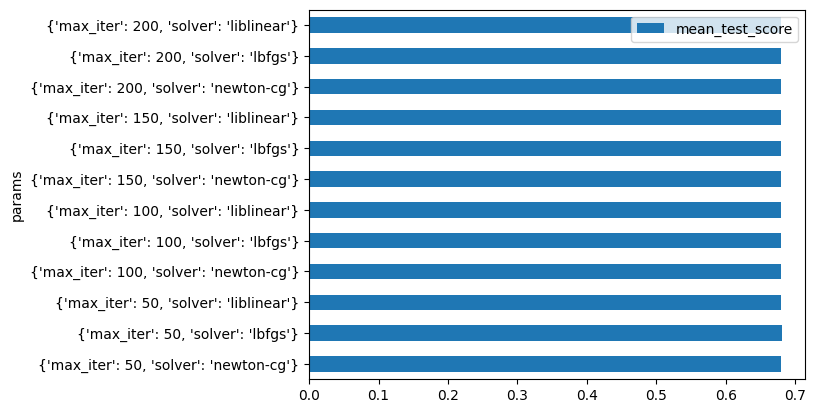

In [ ]:
# visualise the result
results.loc[:,['params','mean_test_score']].plot.barh(x = 'params')

In [ ]:
# Evaluate the model on the test set using precision

test_score = gscv.score(x_test_preprocessed, y_test)
print("Test set accuracy with best hyperparameters:", test_score)

Test set accuracy with best hyperparameters: 0.6855413105413105


RandomSearchCV on AirBnb dataset

Model: Logistic Regression

Model Name: model

Start with the train and test data from original model fit and predict.

x_train_preprocessed

x_test_preprocessed

y_train

y_test


In [ ]:
# Verify we have Logistic Regression model

type(model)

sklearn.linear_model._logistic.LogisticRegression

In [ ]:
# List model hyperparameters info

?model

In [ ]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
random_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],'max_iter': [50,100,150, 200]}
####random_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C' : [100, 10, 1.0, 0.1, 0.01]}

In [ ]:
# Create the RandomizedSearchCV object

from sklearn import model_selection

####rscv = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
rscv = model_selection.RandomizedSearchCV(estimator=model, param_distributions=random_params, n_iter=50, cv=5, scoring='accuracy' , random_state=100)


In [ ]:
rscv.fit(x_train_preprocessed, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=50,
                   param_distributions={'max_iter': [50, 100, 150, 200],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=100, scoring='accuracy')

In [ ]:
best_params = rscv.best_params_
print("Best hyperparameters found by RandomizedSearchCV:", best_params)

Best hyperparameters found by RandomizedSearchCV: {'solver': 'lbfgs', 'max_iter': 50}


In [ ]:
import pandas as pd
# convert the results dictionary to a pandas data frame
results = pd.DataFrame(rscv.cv_results_)
# show the top 5 hyperparamaterizations
print(results.loc[:,['params','rank_test_score']].sort_values('rank_test_score').head(5))

                                     params  rank_test_score
1       {'solver': 'lbfgs', 'max_iter': 50}                1
0   {'solver': 'newton-cg', 'max_iter': 50}                2
2   {'solver': 'liblinear', 'max_iter': 50}                2
3  {'solver': 'newton-cg', 'max_iter': 100}                2
4      {'solver': 'lbfgs', 'max_iter': 100}                2


In [ ]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)

In [ ]:
# look at the top 5 best hyperparamaterizations
results.sort_values('mean_test_score',ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.187545,0.008254,0.002200,0.000019,lbfgs,50,"{'solver': 'lbfgs', 'max_iter': 50}",0.7932,0.795347,0.797264,0.808513,0.794324,0.797730,0.005555,1
0,0.277183,0.027765,0.002222,0.000025,newton-cg,50,"{'solver': 'newton-cg', 'max_iter': 50}",0.7932,0.795347,0.797264,0.808258,0.794452,0.797704,0.005440,2
2,0.120754,0.001922,0.002373,0.000039,liblinear,50,"{'solver': 'liblinear', 'max_iter': 50}",0.7932,0.795347,0.797264,0.808130,0.794580,0.797704,0.005376,2
3,0.264143,0.023408,0.003703,0.002959,newton-cg,100,"{'solver': 'newton-cg', 'max_iter': 100}",0.7932,0.795347,0.797264,0.808258,0.794452,0.797704,0.005440,2
4,0.287309,0.021506,0.002234,0.000031,lbfgs,100,"{'solver': 'lbfgs', 'max_iter': 100}",0.7932,0.795347,0.797264,0.808258,0.794452,0.797704,0.005440,2


<Axes: ylabel='params'>

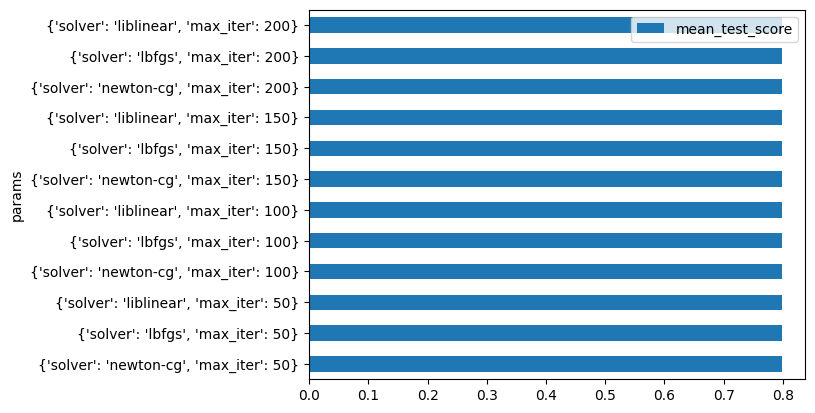

In [ ]:
# plot performing models
results.loc[:,['params','mean_test_score']].plot.barh(x = 'params')


In [ ]:
# Evaluate the model on the test set
test_score = rscv.score(x_test_preprocessed, y_test)
print("Test set accuracy score with best hyperparameters:", test_score)

Test set accuracy score with best hyperparameters: 0.8023315267409755


RandomSearchCV on AirBnb dataset

Model: Ridge Regression Linear model

Model Name: ridge_reg

Start with the log train data and the log test data from the original Ridge Regression model fit and predict.

x_log_train_preprocessed

x_log_test_preprocessed

y_log_train

y_log_test


In [ ]:
from sklearn import datasets, linear_model, model_selection
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Note log(0) gives Runtime error
np.log(0)

<ipython-input-86-da0ec9b66bcb>:2: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
# split data into training and validation sets
original_df = df.drop('above_average', axis=1)
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(original_df.drop('price', axis=1), np.log(original_df['price']+ 0.0001), test_size=0.2, random_state=42)

In [ ]:
# Fit and transform the training set
x_log_train_preprocessed = preprocessor.fit_transform(x_log_train)

# Transform the testing set
x_log_test_preprocessed = preprocessor.transform(x_log_test)

Text(0, 0.5, 'P(alpha)')

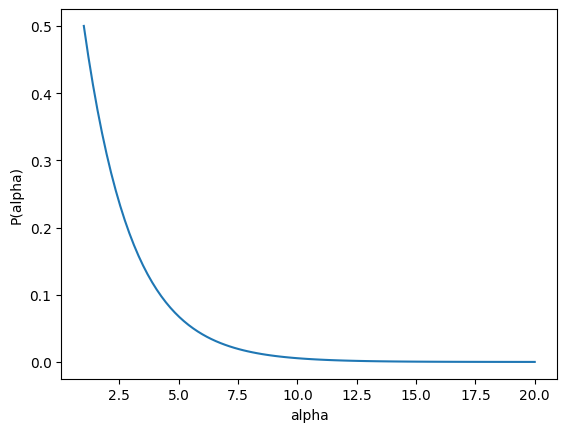

In [ ]:
# values of alpha
x = np.linspace(1, 20, 100)
# probabilities
p_X = stats.gamma.pdf(x=x, a=1, loc=1, scale=2)
plt.plot(x,p_X)
plt.xlabel('alpha')
plt.ylabel('P(alpha)')

In [ ]:
# n sample values
n_iter = 100
# sample from the gamma distribution
samples = stats.gamma.rvs(a=1, loc=1, scale=2, size=n_iter, random_state=100)

Text(0, 0.5, 'sample count')

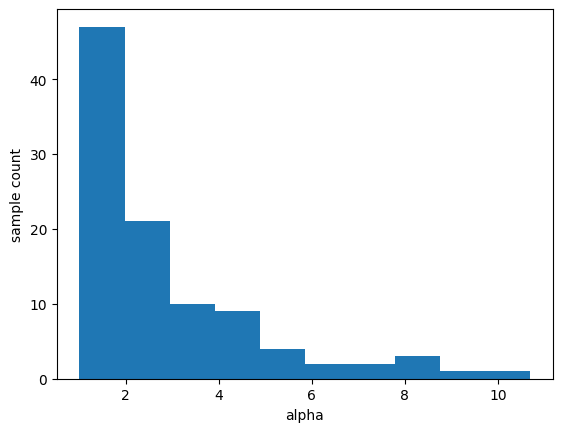

In [ ]:
# visualize the sample distribution
plt.hist(samples)
plt.xlabel('alpha')
plt.ylabel('sample count')

In [ ]:
# we will store the results inside a dictionary
result = {}
# for each sample
for sample in samples:
  ridge_reg = linear_model.Ridge(alpha=sample)
  cv = model_selection.cross_val_score(ridge_reg, x_log_train_preprocessed, y_log_train, cv=10,scoring='neg_mean_squared_error')
  # retain the result in the dictionary
  result[sample] = [cv.mean()]

In [ ]:
"""
convert the result dictionary to a pandas dataframe, 
transpose and reset the index
"""
df_result = pd.DataFrame(result).T.reset_index()
# give the columns sensible names
df_result.columns = ['alpha', 'mean_neg_mean_squared_error']
print(df_result.sort_values('mean_neg_mean_squared_error', ascending=False).head())

       alpha  mean_neg_mean_squared_error
4   1.009460                     -0.29203
26  1.011409                     -0.29203
29  1.030745                     -0.29203
43  1.041302                     -0.29203
34  1.074316                     -0.29203


Text(0, 0.5, '-MSE')

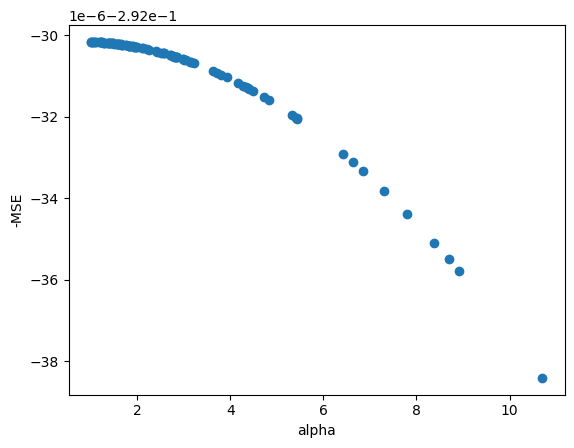

In [ ]:
plt.scatter(df_result.alpha,df_result.mean_neg_mean_squared_error)
plt.xlabel('alpha')
plt.ylabel('-MSE')

RandomSearchCV on AirBnB with Ridge Regression linear model

In [ ]:
ridge_reg = linear_model.Ridge()

In [ ]:
# List Ridge Regression model hyper-parameters
ridge_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
?ridge_reg

In [ ]:
# Build a Gamma distribution of alpha values

# alpha ~ gamma(1,1)
param_dist = {'alpha': stats.gamma(a=1, loc=1, scale=2)}

In [ ]:
"""
set up the random search to sample 100 values and 
score on negative mean squared error
"""
rscv = model_selection.RandomizedSearchCV(estimator=ridge_reg, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error')
# start the search
rscv.fit(x_log_train_preprocessed, y_log_train)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2ad94e2c70>},
                   scoring='neg_mean_squared_error')

In [ ]:
import pandas as pd
# convert the results dictionary to a pandas data frame
results = pd.DataFrame(rscv.cv_results_)
# show the top 5 hyperparamaterizations
print(results.loc[:,['params','rank_test_score']].sort_values('rank_test_score').head(5))

                           params  rank_test_score
50   {'alpha': 1.020001500528416}                1
75  {'alpha': 1.0207418841884641}                2
44  {'alpha': 1.0232629455206024}                3
76   {'alpha': 1.052901774361766}                4
27  {'alpha': 1.0831942518790134}                5


In [ ]:
#show all results
print(results.loc[:,['params','rank_test_score']].sort_values('rank_test_score'))

                           params  rank_test_score
50   {'alpha': 1.020001500528416}                1
75  {'alpha': 1.0207418841884641}                2
44  {'alpha': 1.0232629455206024}                3
76   {'alpha': 1.052901774361766}                4
27  {'alpha': 1.0831942518790134}                5
..                            ...              ...
19   {'alpha': 7.139183150985448}               96
8    {'alpha': 8.740578836879035}               97
36  {'alpha': 10.104114703706747}               98
13  {'alpha': 11.945276109815868}               99
63  {'alpha': 13.171636702016325}              100

[100 rows x 2 columns]


Implementing Bayesian Optimization

In [ ]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from bayes_opt import BayesianOptimization

In [ ]:
# Function to optimize
def xgb_cv(n_estimators, max_depth, gamma, min_child_weight, subsample, data, target):
    estimator = xgb.XGBRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        random_state=42,
    )
    cval = cross_val_score(estimator, data, target, scoring='neg_mean_squared_error', cv=5)
    return cval.mean()

# BayesianOptimization
def optimize_xgb(data, target):
    def xgb_crossval(n_estimators, max_depth, gamma, min_child_weight, subsample):
        return xgb_cv(
            n_estimators=n_estimators,
            max_depth=max_depth,
            gamma=gamma,
            min_child_weight=min_child_weight,
            subsample=subsample,
            data=data,
            target=target,
        )

    optimizer = BayesianOptimization(
        f=xgb_crossval,
        pbounds={
            "n_estimators": (50, 500),
            "max_depth": (3, 10),
            "gamma": (0, 1),
            "min_child_weight": (0, 10),
            "subsample": (0.5, 1),
        },
        random_state=42,
        verbose=2,
    )
    optimizer.maximize(init_points=5, n_iter=10)
    return optimizer.max

In [ ]:
from sklearn.model_selection import cross_val_score

# Find optimal hyperparameters using Bayesian Optimization
best_params = optimize_xgb(x_log_train_preprocessed, y_train)
print("Best hyperparameters found by Bayesian Optimization:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb = xgb.XGBRegressor(
    n_estimators=int(best_params["params"]["n_estimators"]),
    max_depth=int(best_params["params"]["max_depth"]),
    gamma=best_params["params"]["gamma"],
    min_child_weight=best_params["params"]["min_child_weight"],
    subsample=best_params["params"]["subsample"],
    random_state=42,
)

best_xgb.fit(x_log_train_preprocessed, y_train)

# Evaluate the model on the test set
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_xgb.predict(x_log_test_preprocessed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test set Mean Squared Error with best hyperparameters:", mse)
print("Test set R^2 score with best hyperparameters:", r2)

|   iter    |  target   |   gamma   | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------


KeyboardInterrupt: ignored

# Neural Networks


Dataset: AirBnb
1. Method: Classification using Keras Tensorflow

Target: above_average price

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv")
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
36658,29144832,Luxurious home in the sky overlooking 5th Ave.,214270886,Maka,Manhattan,Midtown,40.75138,-73.98143,Entire home/apt,300,1,10,2019-02-01,1.15,1,0
48281,36177135,Historic Rockaway Beach Bungalow-By Subway & B...,271885652,Elizabeth,Queens,Rockaway Beach,40.58818,-73.81302,Entire home/apt,139,1,1,2019-07-05,1.00,4,171
18849,14959206,Cozy Modern Townhouse Studio Williamsburg BK,41177070,Dennis,Brooklyn,Williamsburg,40.71279,-73.94443,Entire home/apt,145,3,96,2019-06-26,2.87,2,0
4173,2708371,Factory Converted 1BR Loft Brooklyn,7503643,Vida,Brooklyn,Greenpoint,40.72595,-73.94143,Entire home/apt,149,30,2,2017-07-03,0.08,52,341
3225,1928556,"Private Apt, Large, Safe / 5mins to TIMES SQUARE",4482351,Zoey,Manhattan,Hell's Kitchen,40.76143,-73.99223,Entire home/apt,140,5,17,2019-04-08,0.25,2,2


In [49]:
df.shape

(48895, 16)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [51]:
to_drop = ['id', 'reviews_per_month','name','host_id','last_review','host_name' ]
df = df.drop(to_drop, axis = 1)
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [52]:
#Let's create a variable above_average which is 1 if the price is above (or equal to) 152.
# Create a new column 'above_average'
df['above_average'] = (df['price'] >= 152).astype(int)

In [53]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,0


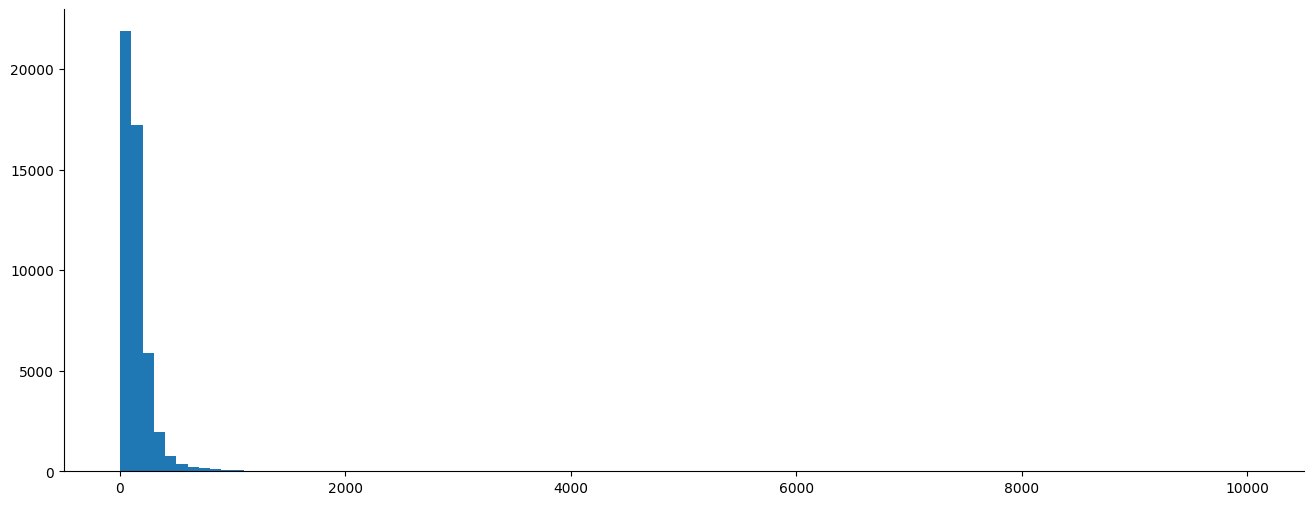

In [54]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df['price'], bins=100);

In [55]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [56]:
print(min(df['price']))
print(max(df['price']))

0
10000


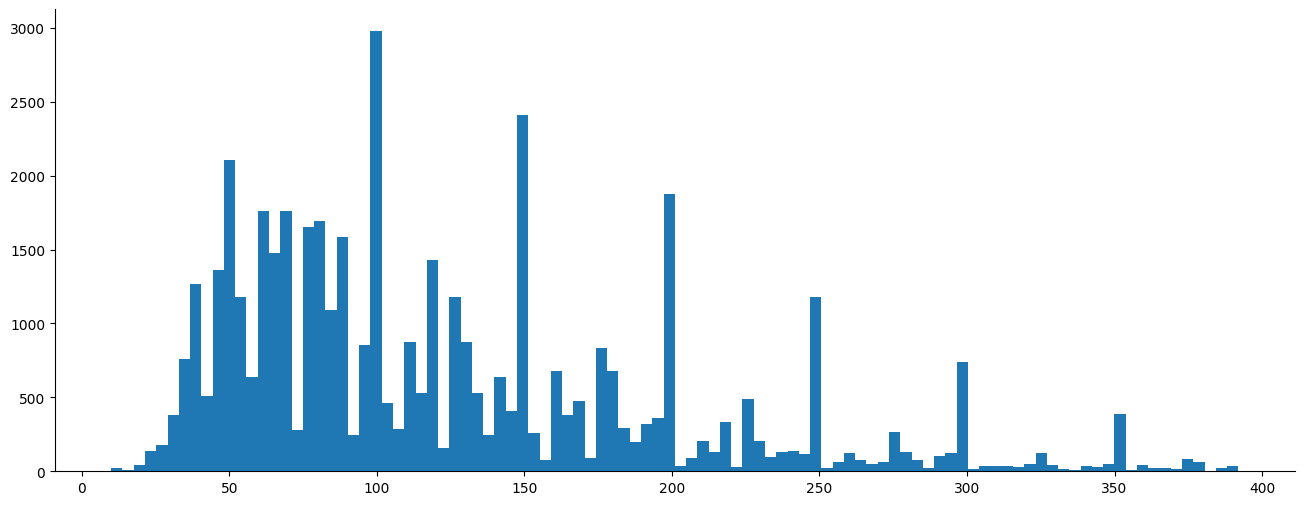

In [57]:
from scipy import stats


# Calculate Z-values
df['price_z'] = np.abs(stats.zscore(df['price']))

#print(df['price_z'])
#plt.hist(df['price_z'], bins=100)
#print(min(df['price_z']))
#print(max(df['price_z']))

# Filter out outliers
df = df[df['price_z'] <= 1]

# Remove houses listed for $0
df = df[df['price'] != 0]

# Drop the column
df = df.drop('price_z', axis=1)

# Draw a histogram
plt.hist(df['price'], bins=100);

In [58]:
df.shape

(46747, 11)

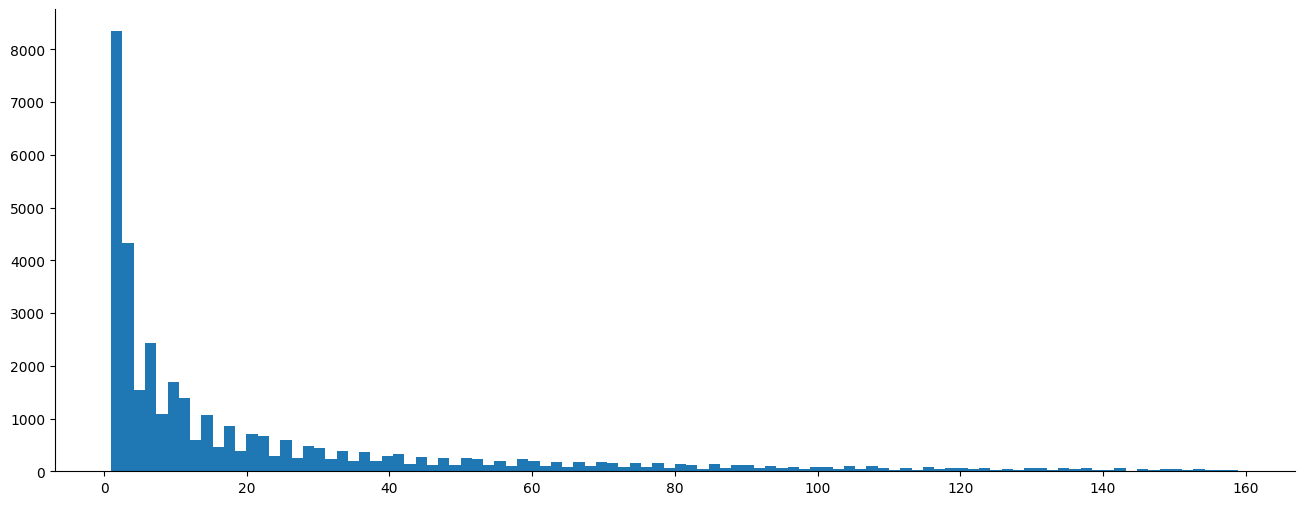

In [59]:
from scipy import stats


# Calculate Z-values
df['number_of_reviews_z'] = np.abs(stats.zscore(df['number_of_reviews']))

# Filter out outliers
df = df[df['number_of_reviews_z'] <= 3]

# Remove houses listed for $0
df = df[df['number_of_reviews'] != 0]

# Drop the column
df = df.drop('number_of_reviews_z', axis=1)

# Draw a histogram
plt.hist(df['number_of_reviews'], bins=100);

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36299 entries, 0 to 48852
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             36299 non-null  object 
 1   neighbourhood                   36299 non-null  object 
 2   latitude                        36299 non-null  float64
 3   longitude                       36299 non-null  float64
 4   room_type                       36299 non-null  object 
 5   price                           36299 non-null  int64  
 6   minimum_nights                  36299 non-null  int64  
 7   number_of_reviews               36299 non-null  int64  
 8   calculated_host_listings_count  36299 non-null  int64  
 9   availability_365                36299 non-null  int64  
 10  above_average                   36299 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 3.3+ MB


In [61]:
# Drop original columns
df = df.drop(['price'], axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2,355,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,1,0,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,1,129,1
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,49,1,0,0


In [62]:
df['neighbourhood'].value_counts()

Williamsburg          2973
Bedford-Stuyvesant    2970
Harlem                2094
Bushwick              1874
Hell's Kitchen        1378
                      ... 
Howland Hook             2
West Farms               2
Rossville                1
Richmondtown             1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [63]:
df.to_csv("neural_network_cleanup.csv")

In [64]:
def remap_location(data: pd.DataFrame, 
                   location: str, 
                   threshold: int = 50) -> str:
    if len(data[data['neighbourhood'] == location]) < threshold:
        return 'Rare'
    return location

In [65]:
df['neighbourhood'] = df['neighbourhood'].apply(
    lambda x: remap_location(data=df, location=x)
)
df.sample(10)

df.sample(20)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
25838,Brooklyn,Bedford-Stuyvesant,40.68568,-73.91923,Private room,30,5,1,178,0
8004,Manhattan,Lower East Side,40.72134,-73.99104,Entire home/apt,2,25,1,200,1
46854,Brooklyn,Bedford-Stuyvesant,40.67813,-73.92904,Private room,5,1,3,356,0
5982,Manhattan,East Village,40.72902,-73.98814,Entire home/apt,6,1,1,0,1
1431,Manhattan,Upper West Side,40.78455,-73.97352,Entire home/apt,5,8,3,0,0
21283,Manhattan,Upper East Side,40.77759,-73.95321,Private room,1,133,1,43,0
16021,Manhattan,Upper East Side,40.76635,-73.95683,Private room,5,1,2,0,0
44881,Manhattan,Chelsea,40.74443,-73.99166,Private room,1,7,3,87,0
13949,Manhattan,Harlem,40.82500,-73.95226,Private room,2,84,2,311,0
13024,Brooklyn,East Flatbush,40.64165,-73.94062,Private room,2,32,4,362,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36299 entries, 0 to 48852
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             36299 non-null  object 
 1   neighbourhood                   36299 non-null  object 
 2   latitude                        36299 non-null  float64
 3   longitude                       36299 non-null  float64
 4   room_type                       36299 non-null  object 
 5   minimum_nights                  36299 non-null  int64  
 6   number_of_reviews               36299 non-null  int64  
 7   calculated_host_listings_count  36299 non-null  int64  
 8   availability_365                36299 non-null  int64  
 9   above_average                   36299 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.0+ MB


In [71]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['minimum_nights', 'number_of_reviews','calculated_host_listings_count', 
         'availability_365']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['neighbourhood_group', 'neighbourhood', 'room_type'])
)

In [72]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2,355,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,1,0,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,1,129,1
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,49,1,0,0


In [73]:
X = df.drop('above_average', axis=1)
y = df['above_average']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [74]:
# Fit
transformer.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['minimum_nights', 'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['neighbourhood_group', 'neighbourhood',
                                  'room_type'])])

In [75]:
# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [76]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [77]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [78]:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [81]:
tf.random.set_seed(42)

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [83]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [85]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
908/908 [==============================] - 5s 4ms/step - loss: 0.3912 - accuracy: 0.8096 - precision: 0.6459 - recall: 0.5992
Epoch 2/100
908/908 [==============================] - 3s 4ms/step - loss: 0.3787 - accuracy: 0.8168 - precision: 0.6541 - recall: 0.6329
Epoch 3/100
908/908 [==============================] - 4s 5ms/step - loss: 0.3758 - accuracy: 0.8182 - precision: 0.6578 - recall: 0.6333
Epoch 4/100
908/908 [==============================] - 3s 4ms/step - loss: 0.3740 - accuracy: 0.8188 - precision: 0.6536 - recall: 0.6510
Epoch 5/100
908/908 [==============================] - 3s 3ms/step - loss: 0.3723 - accuracy: 0.8188 - precision: 0.6546 - recall: 0.6476
Epoch 6/100
908/908 [==============================] - 4s 4ms/step - loss: 0.3707 - accuracy: 0.8204 - precision: 0.6630 - recall: 0.6347
Epoch 7/100
908/908 [==============================] - 4s 4ms/step - loss: 0.3688 - accuracy: 0.8202 - precision: 0.6623 - recall: 0.6355
Epoch 8/100
908/908 [=============

In [86]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

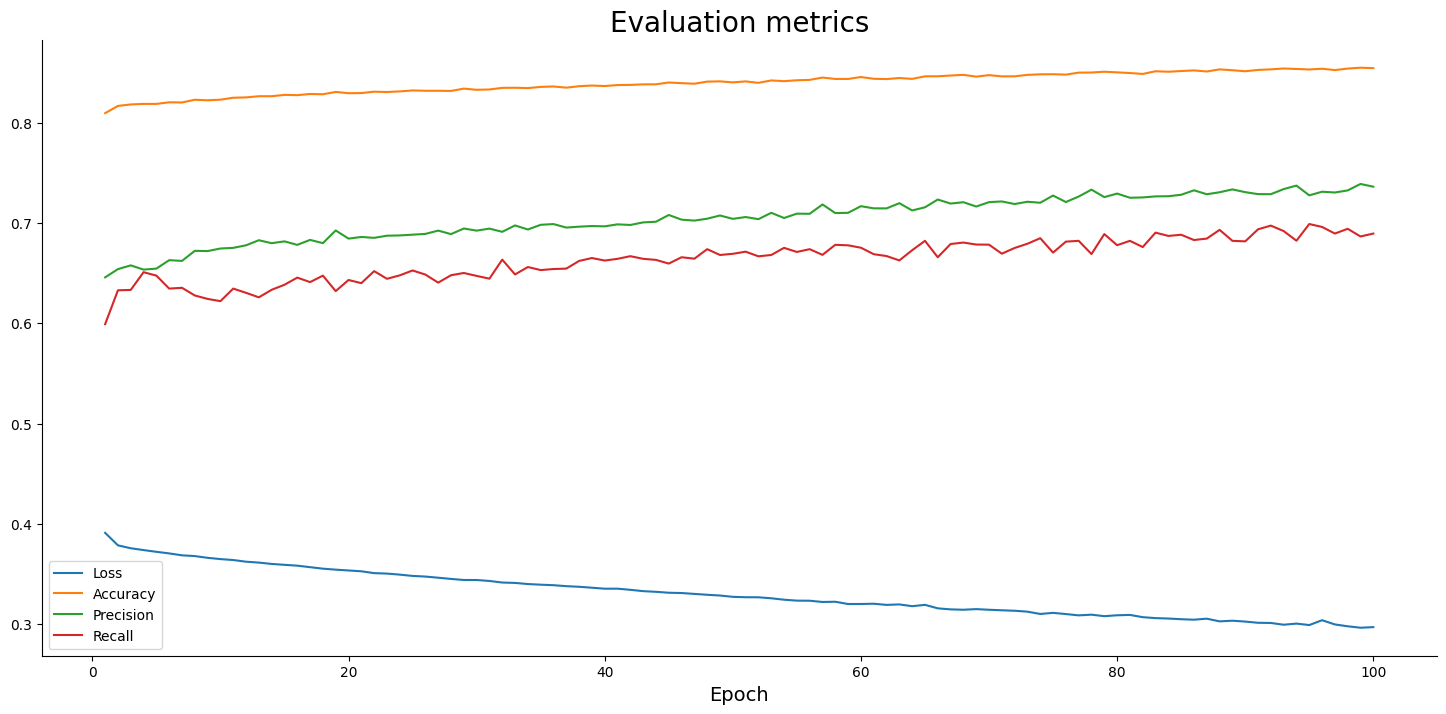

In [90]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [92]:
 # Predictions
 predictions = model.predict(X_test)

227/227 [==============================] - 1s 3ms/step


In [94]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [95]:
prediction_classes

[0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [99]:
print(confusion_matrix(y_test, prediction_classes))

[[4832  550]
 [ 781 1097]]


In [100]:
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.82
Precision: 0.67
Recall: 0.58
